In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#EDA study will mainly focus on revenue
df = pd.read_csv("data_customer_final_cleaned.csv")
print("Shape:", df.shape)
df.head()


Shape: (100, 12)


,TransactionID,Timestamp,BranchLocation,CustomerID,BarberName,BarberTier,Rating (1-5),Duration (Minutes),PriceUSD,Service,Gender,DayOfWeek
0,TRX001,2025-01-01 10:45:11,Jakarta Selatan,CUST188,Budi,Senior,5.0,28.0,3.87,Potong Rambut Pria,Male,Wednesday
1,TRX002,2025-01-01 11:20:45,Jakarta Pusat,CUST112,Eko,Junior,4.0,21.0,2.26,Cukur Jenggot,Male,Wednesday
2,TRX003,2025-01-01 12:55:01,Jakarta Utara,CUST134,Charlie,Senior,5.0,33.0,3.55,Potong Rambut Pria,Male,Wednesday
3,TRX004,2025-01-01 14:18:22,Jakarta Timur,CUST176,Joko,Junior,4.0,53.0,4.84,Paket Ganteng,Male,Wednesday
4,TRX005,2025-01-01 15:30:10,Jakarta Selatan,CUST195,Rina,Senior,5.0,59.0,6.13,Potong Rambut Wanita,Female,Wednesday


In [7]:
#revenue
total_revenue = df["PriceUSD"].sum()
average_revenue = df["PriceUSD"].mean()
median_revenue = df["PriceUSD"].median()
max_revenue = df["PriceUSD"].max()
min_revenue = df["PriceUSD"].min()

print(f" Total Revenue: ${total_revenue:,.2f}")
print(f" Average Revenue per Transaction: ${average_revenue:.2f}")
print(f" Median Revenue per Transaction: ${median_revenue:.2f}")
print(f" Max Transaction: ${max_revenue:.2f}")
print(f" Min Transaction: ${min_revenue:.2f}")
# Mode of revenue (PriceUSD)
revenue_mode = df["PriceUSD"].mode()[0]
print(f" Most frequent (mode) transaction value: ${revenue_mode:.2f}")

# Modes for categorical variables
categorical_cols = ["Service", "Gender", "DayOfWeek", "BarberName", "BranchLocation"]

for col in categorical_cols:
    if col in df.columns:
        most_common = df[col].mode()[0]
        count = df[col].value_counts().iloc[0]
        print(f" {col}: most common = '{most_common}'  ({count} occurrences)")


 Total Revenue: $491.35
 Average Revenue per Transaction: $4.91
 Median Revenue per Transaction: $3.71
 Max Transaction: $16.13
 Min Transaction: $2.26
 Most frequent (mode) transaction value: $2.26
 Service: most common = 'Potong Rambut Pria'  (29 occurrences)
 Gender: most common = 'Male'  (88 occurrences)
 DayOfWeek: most common = 'Friday'  (18 occurrences)
 BarberName: most common = 'Joko'  (24 occurrences)
 BranchLocation: most common = 'Jakarta Pusat'  (26 occurrences)


In [8]:
modes = {}
for col in df.columns:
    try:
        modes[col] = df[col].mode()[0]
    except:
        modes[col] = None

pd.DataFrame.from_dict(modes, orient="index", columns=["Most Frequent Value"])



,Most Frequent Value
TransactionID,TRX001
Timestamp,2025-01-01 10:45:11
BranchLocation,Jakarta Pusat
CustomerID,CUST101
BarberName,Joko
BarberTier,Senior
Rating (1-5),5.0
Duration (Minutes),18.0
PriceUSD,2.26
Service,Potong Rambut Pria


                    Rating (1-5)  Duration (Minutes)  PriceUSD
Rating (1-5)            1.000000            0.057241  0.066676
Duration (Minutes)      0.057241            1.000000  0.976702
PriceUSD                0.066676            0.976702  1.000000


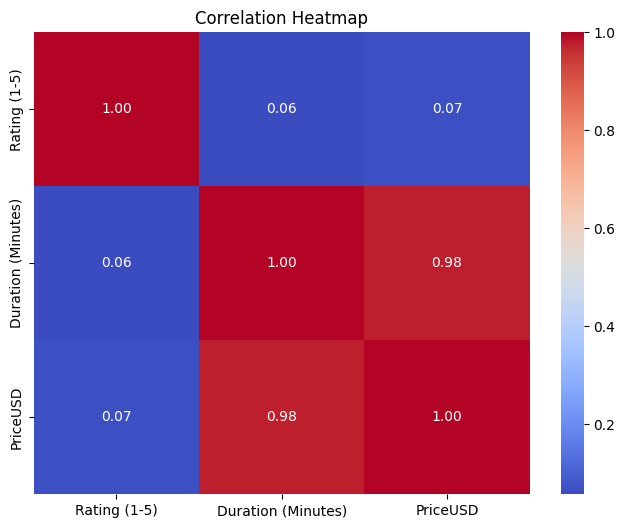

In [9]:

corr = df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
#barbertier and rating and revenue
group_summary = (
    df.groupby("BarberTier")[["PriceUSD", "Rating (1-5)"]]
      .mean()
      .rename(columns={"PriceUSD": "AvgRevenue", "Rating (1-5)": "AvgRating"})
      .sort_values("AvgRevenue", ascending=False)
)

print(group_summary)
# no signifacant rating difference however seniors revnue is on average 47.1% more

            AvgRevenue  AvgRating
BarberTier                       
Senior        5.720536   4.678571
Junior        3.886364   4.477273


Average Daily Revenue: 37.8
CustomerID
CUST186    32.26
CUST181    32.26
CUST145    29.68
CUST115    28.38
CUST166    27.10
Name: PriceUSD, dtype: float64


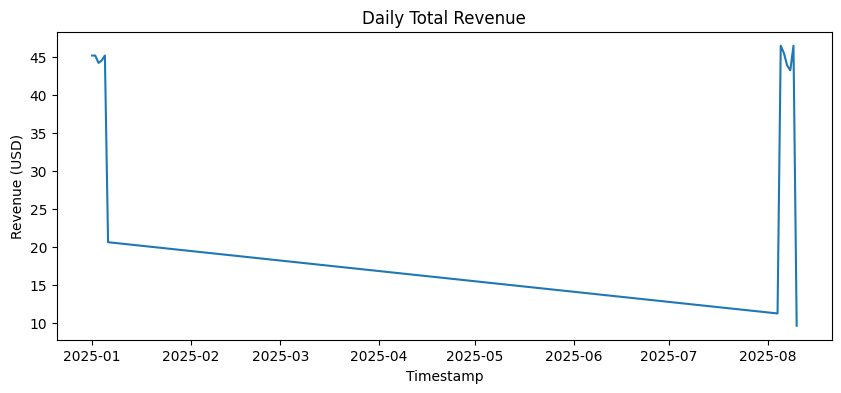

In [11]:
#Revenue per Day and per Customer (Temporal insight)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
daily_revenue = df.groupby(df["Timestamp"].dt.date)["PriceUSD"].sum()

print("Average Daily Revenue:", round(daily_revenue.mean(),2))
daily_revenue.plot(figsize=(10,4), title="Daily Total Revenue", ylabel="Revenue (USD)")
#This identifies heavy spenders (loyalty potential).
top_customers = (
    df.groupby("CustomerID")["PriceUSD"].sum()
      .sort_values(ascending=False)
      .head(5)
)
print(top_customers)


In [12]:
#Revenue efficiency per minute
if "Duration (Minutes)" in df.columns:
    df["RevenuePerMinute"] = df["PriceUSD"] / df["Duration (Minutes)"]
    avg_rpm = df.groupby("Service")["RevenuePerMinute"].mean().sort_values(ascending=False)
    print(avg_rpm)


Service
Cat Rambut              0.125379
Potong Rambut Anak      0.124841
Cukur Jenggot           0.122849
Potong Rambut Pria      0.122742
Paket Ganteng           0.103434
Potong Rambut Wanita    0.099969
Name: RevenuePerMinute, dtype: float64


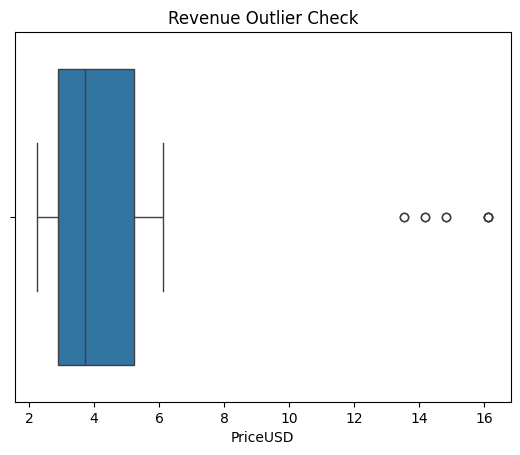

In [13]:
#Check for outliers
sns.boxplot(x=df["PriceUSD"])
plt.title("Revenue Outlier Check")
plt.show()
